## Mounting Environemnt If On Colab

In [1]:
# # If you are working in Colab, then consider mounting your assignment folder to your drive
# from google.colab import drive
# drive.mount('/content/drive')

# # # Direct to your assignment folder.
# %cd /content/drive/MyDrive/ColabNotebooks/Semester_Project_II/zebra_SAM

Mounted at /content/drive
/content/drive/MyDrive/ColabNotebooks/Semester_Project_II/zebra_SAM


## Installing Environment Requirements. Only Do Once If Project Is Local

In [2]:
!sudo apt install imagemagick

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libdjvulibre-text libdjvulibre21
  libfftw3-double3 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0
  libjxr-tools libjxr0 liblqr-1-0 libmagickcore-6.q16-6
  libmagickcore-6.q16-6-extra libmagickwand-6.q16-6 libnetpbm10
  libwmflite-0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre
  ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng enscript gimp
  gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance sane-utils
  texlive-base-bin transfig ufraw-batch libfftw3-bin libfftw3-dev inkscape
  poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fon

In [3]:
!apt-get install -y libmagickwand-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  gir1.2-freedesktop gir1.2-gdkpixbuf-2.0 gir1.2-rsvg-2.0 libblkid-dev libblkid1
  libcairo-script-interpreter2 libcairo2-dev libdjvulibre-dev libffi-dev libgdk-pixbuf-2.0-dev
  libgdk-pixbuf2.0-bin libglib2.0-dev libglib2.0-dev-bin libice-dev liblcms2-dev liblqr-1-0-dev
  liblzo2-2 libmagickcore-6-arch-config libmagickcore-6-headers libmagickcore-6.q16-dev
  libmagickwand-6-headers libmagickwand-6.q16-dev libmount-dev libmount1 libpixman-1-dev
  librsvg2-common librsvg2-dev libselinux1-dev libsepol-dev libsm-dev libwmf-0.2-7 libwmf-dev
  libxcb-render0-dev libxcb-shm0-dev libxt-dev
Suggested packages:
  libcairo2-doc libgirepository1.0-dev libglib2.0-doc libxml2-utils libice-doc cryptsetup-bin
  librsvg2-doc libsm-doc libwmf-0.2-7-gtk libwmf-doc libxt-doc
The following NEW packages will be installed:
  gir1.2-freedesktop gir1.2-gdkpixbuf

In [4]:
!pip install -q git+https://github.com/huggingface/transformers.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [5]:
!pip install -r requirements.txt

  Cloning https://github.com/mhe/pynrrd.git to /tmp/pip-req-build-6f4d4_b3
  Running command git clone --filter=blob:none --quiet https://github.com/mhe/pynrrd.git /tmp/pip-req-build-6f4d4_b3
  Resolved https://github.com/mhe/pynrrd.git to commit d7f1d0ced4aadb01cc160b16e2763d27e7e3d386
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
 

## Imports

In [6]:
%load_ext autoreload
%autoreload 2

import random
import os
import glob
import time
import warnings
import io

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
# import opendatasets as od
import datasets as dts

from PIL import Image
from IPython.display import clear_output
from tqdm.notebook import tqdm
from typing import Dict, List, Tuple
from statistics import mean


import torch
import monai
import cv2
import torchvision
import torch.optim.lr_scheduler as lr_scheduler
from torch import nn
from torch.utils.data import DataLoader
from torch.optim import Adam
from torchvision import transforms
from monai.transforms import Compose, NormalizeIntensityd
from monai.metrics import compute_iou
from sklearn.model_selection import train_test_split

from transformers import SamProcessor
from transformers import SamModel

# Custom .py files
from generate_data_folder import generate_data_folder
from tiff_to_jpgs import adjust_jpg

# CONFIGURATION

In [7]:
plt.style.use("dark_background")
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [8]:
class CFG:
    DATASET_PATH = "data/"
    TRAIN_PATH = "data/"

    DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
    TRAIN_BATCH_SIZE = 2
    TEST_BATCH_SIZE = 1
    LEARNING_RATE = 1e-3
    WEIGHT_DECAY = 0
    EPOCH = 30

print(CFG.DEVICE)

cuda


# DATA PREPARATION

## Adapte Raw Zebrafish Data. Do NOT Execute If Data Already Available

In [9]:
# # Custom .py files
# from generate_data_singleMask import generate_data_folder
# from tiff_to_jpgs import adjust_jpg

# rawData_path = "raw_data/zebrafish_2"
# tifPath = rawData_path + "/t0010_Channel 3.tif"
# nrrdPath = rawData_path + "/Segmentation_10.seg.nrrd"

# # Create data folder for training
# generate_data_folder(tif_file_path=tifPath, nrrd_file_path=nrrdPath, zebrafish_number=2)

## Create dataframes containing the image and mask paths

In [10]:
dataset_images = glob.glob(f"{CFG.TRAIN_PATH}**/*.tif")
dataset_images

['data/zebrafish_1/zebrafish_1_frame_94_mask.tif',
 'data/zebrafish_1/zebrafish_1_frame_96_mask.tif',
 'data/zebrafish_1/zebrafish_1_frame_97_mask.tif',
 'data/zebrafish_1/zebrafish_1_frame_95_mask.tif',
 'data/zebrafish_1/zebrafish_1_frame_99_mask.tif',
 'data/zebrafish_1/zebrafish_1_frame_98_mask.tif',
 'data/zebrafish_1/zebrafish_1_frame_100_mask.tif',
 'data/zebrafish_1/zebrafish_1_frame_101_mask.tif',
 'data/zebrafish_1/zebrafish_1_frame_102_mask.tif',
 'data/zebrafish_1/zebrafish_1_frame_103_mask.tif',
 'data/zebrafish_1/zebrafish_1_frame_104_mask.tif',
 'data/zebrafish_1/zebrafish_1_frame_105_mask.tif',
 'data/zebrafish_1/zebrafish_1_frame_107_mask.tif',
 'data/zebrafish_1/zebrafish_1_frame_106_mask.tif',
 'data/zebrafish_1/zebrafish_1_frame_110_mask.tif',
 'data/zebrafish_1/zebrafish_1_frame_109_mask.tif',
 'data/zebrafish_1/zebrafish_1_frame_108_mask.tif',
 'data/zebrafish_1/zebrafish_1_frame_111_mask.tif',
 'data/zebrafish_1/zebrafish_1_frame_112_mask.tif',
 'data/zebrafish_1

In [11]:
def get_zebrafish_id(image_paths):
    return [(_.split('/')[-2:][0]) for _ in image_paths]

def get_sample_number(image_paths):
    sample_numbers = []
    is_mask = []

    for path in image_paths:
        path_list = path.split('/')[-2:][1].split('_')

        if 'mask.tif' in path_list:
            sample_numbers.append(int(path_list[-2]))
            is_mask.append(1)
        else:
            sample_numbers.append(int(path_list[-1].replace('.tif', '')))
            is_mask.append(0)

    return sample_numbers, is_mask

def build_df(image_paths):
    sample_numbers, mask_label = get_sample_number(image_paths)
    # create dataframe
    df = pd.DataFrame({
        'id'        : sample_numbers,
        'zebrafish'   : get_zebrafish_id(image_paths),
        'image_path': image_paths,
        'is_mask'   : mask_label
    })

    return df

In [12]:
dataset_df = (
    build_df(dataset_images)
    .sort_values(by=['id', 'zebrafish', 'image_path'])
    .reset_index(drop=True)
)

dataset_df

,id,zebrafish,image_path,is_mask
0,0,zebrafish_1,data/zebrafish_1/zebrafish_1_frame_0.tif,0
1,0,zebrafish_1,data/zebrafish_1/zebrafish_1_frame_0_mask.tif,1
2,0,zebrafish_2,data/zebrafish_2/zebrafish_2_frame_0.tif,0
3,0,zebrafish_2,data/zebrafish_2/zebrafish_2_frame_0_mask.tif,1
4,0,zebrafish_3,data/zebrafish_3/zebrafish_3_frame_0.tif,0
...,...,...,...,...
805,134,zebrafish_1,data/zebrafish_1/zebrafish_1_frame_134_mask.tif,1
806,134,zebrafish_2,data/zebrafish_2/zebrafish_2_frame_134.tif,0
807,134,zebrafish_2,data/zebrafish_2/zebrafish_2_frame_134_mask.tif,1
808,134,zebrafish_3,data/zebrafish_3/zebrafish_3_frame_134.tif,0


In [13]:
grouped_df = dataset_df.groupby(by='is_mask')
images_df, mask_df = (
    grouped_df.get_group(0).drop('is_mask', axis=1).reset_index(drop=True),
    grouped_df.get_group(1).drop('is_mask', axis=1).reset_index(drop=True)
)

mask_df = mask_df.rename({'image_path': 'mask_path'}, axis=1)

mask_df.head()

,id,zebrafish,mask_path
0,0,zebrafish_1,data/zebrafish_1/zebrafish_1_frame_0_mask.tif
1,0,zebrafish_2,data/zebrafish_2/zebrafish_2_frame_0_mask.tif
2,0,zebrafish_3,data/zebrafish_3/zebrafish_3_frame_0_mask.tif
3,1,zebrafish_1,data/zebrafish_1/zebrafish_1_frame_1_mask.tif
4,1,zebrafish_2,data/zebrafish_2/zebrafish_2_frame_1_mask.tif


In [14]:
def _load(image_path, as_tensor=True):
    image = Image.open(image_path)
    return np.array(image).astype(np.float32) / 255.

def generate_label(mask_path, load_fn):
    mask = load_fn(mask_path)
    if mask.max() > 0:
        return 1 # Brain Tumor Present
    return 0 # Normal

### Combined df

In [15]:
# merge images dataframe and masks dataframe
ds = images_df.merge(
    mask_df,
    on=['id', 'zebrafish'],
    how='left'
)

ds.head()

,id,zebrafish,image_path,mask_path
0,0,zebrafish_1,data/zebrafish_1/zebrafish_1_frame_0.tif,data/zebrafish_1/zebrafish_1_frame_0_mask.tif
1,0,zebrafish_2,data/zebrafish_2/zebrafish_2_frame_0.tif,data/zebrafish_2/zebrafish_2_frame_0_mask.tif
2,0,zebrafish_3,data/zebrafish_3/zebrafish_3_frame_0.tif,data/zebrafish_3/zebrafish_3_frame_0_mask.tif
3,1,zebrafish_1,data/zebrafish_1/zebrafish_1_frame_1.tif,data/zebrafish_1/zebrafish_1_frame_1_mask.tif
4,1,zebrafish_2,data/zebrafish_2/zebrafish_2_frame_1.tif,data/zebrafish_2/zebrafish_2_frame_1_mask.tif


### Splitting the Data! Test Size = 25% Because we Have 3 scans for training and 1 for testing

In [17]:
image_train, image_test, mask_train, mask_test = train_test_split(
ds['image_path'], ds['mask_path'], test_size = 0.25, shuffle=False)

In [18]:
train_df = pd.concat([image_train, mask_train], axis=1).reset_index(drop=True)
train_dataset = dts.Dataset.from_pandas(train_df)

In [19]:
train_df.head()

,image_path,mask_path
0,data/zebrafish_1/zebrafish_1_frame_0.tif,data/zebrafish_1/zebrafish_1_frame_0_mask.tif
1,data/zebrafish_2/zebrafish_2_frame_0.tif,data/zebrafish_2/zebrafish_2_frame_0_mask.tif
2,data/zebrafish_3/zebrafish_3_frame_0.tif,data/zebrafish_3/zebrafish_3_frame_0_mask.tif
3,data/zebrafish_1/zebrafish_1_frame_1.tif,data/zebrafish_1/zebrafish_1_frame_1_mask.tif
4,data/zebrafish_2/zebrafish_2_frame_1.tif,data/zebrafish_2/zebrafish_2_frame_1_mask.tif


In [20]:
test_df = pd.concat([image_test, mask_test], axis=1).reset_index(drop=True)
test_dataset = dts.Dataset.from_pandas(test_df)

## Formating Datasets for Training and testing

### Some Helper Functions for Image Formatting Visualization

In [21]:
def load_and_convert_mask(mask_path):
    try:
        if os.path.exists(mask_path):
            mask = Image.open(mask_path)
            return mask
        else:
            print(f"File not found: {mask_path}")
            return None
    except Exception as e:
        print(f"Error loading image {mask_path}: {e}")
        return None

def load_and_convert_image(image_path):
    try:
        if os.path.exists(image_path):
            with open(image_path, 'rb') as f:
                image = io.BytesIO(f.read())  # Read image data as bytes
            image = (Image.fromarray(adjust_jpg(np.array(Image.open(image))))).convert('RGB')  # Convert bytes to numpy array
            return image
        else:
            print(f"File not found: {image_path}")
            return None
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return None
    
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

### Bounding Box Helper Function to Create Prompts for each Input

In [22]:
def get_bounding_box(ground_truth_map):
    '''
    This function creates varying bounding box coordinates based on the segmentation contours as prompt for the SAM model
    The padding is random int values between 5 and 20 pixels
    '''

    if len(np.unique(ground_truth_map)) > 1:

        # get bounding box from mask
        y_indices, x_indices = np.where(ground_truth_map > 0)
        x_min, x_max = np.min(x_indices), np.max(x_indices)
        y_min, y_max = np.min(y_indices), np.max(y_indices)

        # add perturbation to bounding box coordinates
        H, W = ground_truth_map.shape
        x_min = max(0, x_min - np.random.randint(5, 20))
        x_max = min(W, x_max + np.random.randint(5, 20))
        y_min = max(0, y_min - np.random.randint(5, 20))
        y_max = min(H, y_max + np.random.randint(5, 20))

        bbox = [x_min, y_min, x_max, y_max]

        return bbox
    else:
        return [0, 0, 256, 256]
        # return [0, 256]

### Create Sam Class for path conversion and Image visualization

In [24]:
class SAMDataset(torch.utils.data.Dataset):
  def __init__(self, dataset, processor):
    self.dataset = dataset
    self.processor = processor
    #self.transforms = transforms = Compose([NormalizeIntensityd(divisor=255, keys=['mask'])])

  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, idx):
    item = self.dataset[idx]
    image_path = item["image_path"]
    ground_truth_mask = np.array(load_and_convert_mask(item['mask_path']))
    ground_truth_mask[ground_truth_mask != 0] = 1

    # get bounding box prompt
    prompt = get_bounding_box(ground_truth_mask)

    # prepare image and prompt for the model
    inputs = self.processor(load_and_convert_image(image_path),
                            input_boxes=[[prompt]],
                            return_tensors="pt")

    # remove batch dimension which the processor adds by default
    inputs = {k:v.squeeze(0) for k,v in inputs.items()}

    # add ground truth segmentation and image for visualization
    inputs["ground_truth_mask"] = ground_truth_mask

    return inputs

  def display_img_and_msk(self, idx):

    item = self.dataset[idx]
    img = np.array(load_and_convert_image(item["image_path"]))
    ground_truth_seg = np.array(load_and_convert_mask(item['mask_path']))
    ground_truth_seg[ground_truth_seg !=0] = 1
    ground_truth_seg = ground_truth_seg*255

    fig, axes = plt.subplots()

    axes.imshow(img)
    show_mask(ground_truth_seg, axes, random_color= False)
    axes.title.set_text(f"Ground truth mask")
    axes.axis("off")


In [25]:
processor_custom = SamProcessor.from_pretrained("facebook/sam-vit-base", do_normalize=False, device = CFG.DEVICE)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

In [26]:
train_sam_ds = SAMDataset(dataset=train_dataset, processor=processor_custom)
test_sam_ds = SAMDataset(dataset=test_dataset, processor=processor_custom)

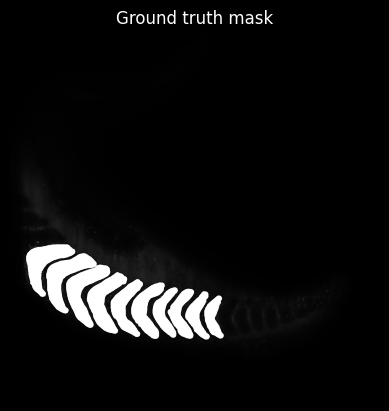

In [27]:
train_sam_ds.display_img_and_msk(idx=80)

### Create Train and Test Dataloader

In [28]:
train_dataloader = DataLoader(train_sam_ds, batch_size=CFG.TRAIN_BATCH_SIZE, shuffle=False)
test_dataloader = DataLoader(test_sam_ds, batch_size=CFG.TEST_BATCH_SIZE, shuffle=False)

In [29]:
batch = next(iter(train_dataloader))
for k,v in batch.items():
  print(k,v.shape)

pixel_values torch.Size([2, 3, 1024, 1024])
original_sizes torch.Size([2, 2])
reshaped_input_sizes torch.Size([2, 2])
input_boxes torch.Size([2, 1, 4])
ground_truth_mask torch.Size([2, 2304, 2304])


In [127]:
def adjust_brightness(image, brightness=70):
    # Convert image to HSV (Hue, Saturation, Value) format
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Increase the V (Value) channel to make the image brighter
    h, s, v = cv2.split(hsv)
    v = cv2.add(v, brightness)
    v = np.clip(v, 0, 255)  # Ensure pixel values are within valid range
    final_hsv = cv2.merge((h, s, v))

    # Convert back to BGR format
    bright_image = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)

    return bright_image


In [128]:
# Function to draw a bounding box around the object in an image
def draw_bounding_box(image):

    # load_and_convert_image

    # Load the image
    image = cv2.imread(image)

    image = adjust_brightness(image)

    # Convert the image to gray scale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a blur to the image to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    # blurred = cv2.GaussianBlur(np.array(image), (5, 5), 0)

    # Threshold the image to get the object in binary
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Find the largest contour, assuming the object to bound is the largest one
    largest_contour = max(contours, key=cv2.contourArea)

    # Draw a bounding box around the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    plt.imshow(image)

    x_min = x
    x_max = x + w
    y_min = y
    y_max = y + h

    return [x_min, y_min, x_max, y_max]


[63, 877, 1878, 1796]

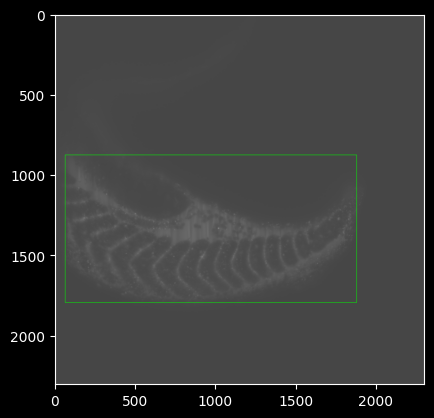

In [129]:
draw_bounding_box(train_dataset[100]['image_path'])

# Modeling

### Deactivate prompt encoder and image encoder parameters from being finetuned

In [30]:
model = SamModel.from_pretrained("facebook/sam-vit-base").to(CFG.DEVICE)

# make sure we only compute gradients for mask decoder
for name, param in model.named_parameters():
  if name.startswith("vision_encoder") or name.startswith("prompt_encoder"):
    param.requires_grad_(False)

config.json:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/375M [00:00<?, ?B/s]

In [31]:
# Note: Hyperparameter tuning could improve performance here
optimizer = Adam(model.mask_decoder.parameters(), lr=CFG.LEARNING_RATE, weight_decay=CFG.WEIGHT_DECAY)
seg_loss = monai.losses.FocalLoss(reduction='mean')

In [36]:
num_epochs = CFG.EPOCH

device = CFG.DEVICE
model.to(device)

model.train()

train_losses = []
train_ious = []
test_losses = []
test_ious = []

for epoch in range(num_epochs):

    print(f'EPOCH: {epoch+1}')

    batch_losses = []
    batch_ious = []

    #########################################
    ############## Train Loop ###############
    #########################################

    for i, batch in enumerate(tqdm(train_dataloader)):

      # forward pass
      outputs = model(pixel_values=batch["pixel_values"].to(device),
                      input_boxes=batch["input_boxes"].to(device),
                      multimask_output=False)

      # process the output
      predicted_masks = outputs.pred_masks.squeeze(1)

      # adapt to proper mask dimensions
      predicted_masks = nn.functional.interpolate(predicted_masks,
                size=(2304, 2304),
                mode='bilinear',
                align_corners=False)

      ground_truth_masks = batch["ground_truth_mask"].float().to(device)

      # print(f"TRAIN UNIQUES : {np.unique(np.array(ground_truth_masks.cpu().numpy()))}")

      sam_masks_prob = torch.sigmoid(predicted_masks)
      sam_masks_prob = sam_masks_prob.squeeze()
      sam_masks = (sam_masks_prob > 0.5)

      # compute loss
      loss = seg_loss(predicted_masks, ground_truth_masks.unsqueeze(1))
      batch_losses.append(loss.item())

      sam_masks = sam_masks.unsqueeze(1)

      if not(sam_masks.shape == (ground_truth_masks.unsqueeze(1)).shape) :
        sam_masks = sam_masks.permute(1, 0, 2).unsqueeze(0)


      ious = compute_iou(sam_masks,
                        ground_truth_masks.unsqueeze(1), ignore_empty=False)
      batch_ious.append(ious.mean())

      # backward pass (compute gradients of parameters w.r.t. loss)
      optimizer.zero_grad()
      loss.backward()

      # optimize
      optimizer.step()

      if torch.cuda.is_available():
        torch.cuda.empty_cache()

    mean_train_loss = mean(batch_losses)
    train_losses.append(mean_train_loss)
    print(f'Mean Train Focal loss: {mean_train_loss}')

    mean_train_iou = mean([t.cpu().item() for t in batch_ious])
    train_ious.append(mean_train_iou)
    print(f'Mean Train IoU: {mean_train_iou}')

    #########################################
    ############## Test Loop ################
    #########################################
    batch_losses = []
    batch_ious = []

    model.eval()

    # Iteratire through test images
    with torch.no_grad():
      for batch in tqdm(test_dataloader):

          # forward pass
          outputs = model(pixel_values=batch["pixel_values"].cuda(),
                          input_boxes=batch["input_boxes"].cuda(),
                          multimask_output=False)

          predicted_masks = outputs.pred_masks.squeeze(1)

          # adapt to proper mask dimensions
          predicted_masks = nn.functional.interpolate(predicted_masks,
                size=(2304, 2304),
                mode='bilinear',
                align_corners=False)

          ground_truth_masks = batch["ground_truth_mask"].float().cuda()


          # apply sigmoid
          sam_mask_prob = torch.sigmoid(predicted_masks)
          sam_mask_prob = sam_mask_prob.cpu().numpy().squeeze()
          sam_mask = (sam_mask_prob > 0.5).astype(np.uint8)

          sam_mask = torch.tensor(sam_mask, device = CFG.DEVICE).unsqueeze(0).unsqueeze(0)

          loss = seg_loss(predicted_masks, ground_truth_masks.unsqueeze(1))
          batch_losses.append(loss.cpu().item())

          iou = compute_iou(sam_mask,
                            ground_truth_masks.unsqueeze(1))


          sam_mask = sam_mask.squeeze(0).squeeze(0)

          batch_ious.append(iou.cpu().item())

    mean_test_loss = np.nanmean(batch_losses)
    test_losses.append(mean_test_loss)
    # print(f'Mean Test Focal loss: {mean_test_loss}')

    if (len(batch_ious) >= 1) :
      mean_test_iou = np.nanmean(batch_ious)
    else :
      mean_test_iou = np.nan
    test_ious.append(mean_test_iou)
    print(f'Mean Test IoU: {mean_test_iou}')

    #########################################
    ############## MODEL SAVING #############
    # Uncomment the following bloc of code
    # in order to save the model every 5 
    # epochs 
    #########################################
    #########################################

    # if (epoch//5 == 0) :
      # Specify the file path where you want to save the model parameters
      # checkpoint_path = f'models/medsam_10soms{epoch+1}.pth'

      # Save the parameters of the entire model
      # torch.save(model.state_dict(), checkpoint_path)

    model.train()

EPOCH: 1


  0%|          | 0/136 [00:00<?, ?it/s]

TRAIN UNIQUES : [0.]
TRAIN UNIQUES : [0.]
TRAIN UNIQUES : [0.]
TRAIN UNIQUES : [0.]
TRAIN UNIQUES : [0.]
TRAIN UNIQUES : [0.]
TRAIN UNIQUES : [0.]
TRAIN UNIQUES : [0.]
TRAIN UNIQUES : [0.]
TRAIN UNIQUES : [0.]
TRAIN UNIQUES : [0.]
TRAIN UNIQUES : [0.]
TRAIN UNIQUES : [0.]
TRAIN UNIQUES : [0.]
TRAIN UNIQUES : [0.]
TRAIN UNIQUES : [0.]
TRAIN UNIQUES : [0.]
TRAIN UNIQUES : [0.]
TRAIN UNIQUES : [0.]
TRAIN UNIQUES : [0.]
TRAIN UNIQUES : [0.]
TRAIN UNIQUES : [0.]
TRAIN UNIQUES : [0.]
TRAIN UNIQUES : [0.]
TRAIN UNIQUES : [0.]
TRAIN UNIQUES : [0.]
TRAIN UNIQUES : [0.]
TRAIN UNIQUES : [0.]
TRAIN UNIQUES : [0.]
TRAIN UNIQUES : [0.]
TRAIN UNIQUES : [0. 1.]
TRAIN UNIQUES : [0.]
TRAIN UNIQUES : [0.]
TRAIN UNIQUES : [0.]
TRAIN UNIQUES : [0.]
TRAIN UNIQUES : [0. 1.]
TRAIN UNIQUES : [0. 1.]
TRAIN UNIQUES : [0. 1.]
TRAIN UNIQUES : [0. 1.]
TRAIN UNIQUES : [0. 1.]
TRAIN UNIQUES : [0. 1.]


KeyboardInterrupt: 

In [ ]:
plt.plot(np.arange(1,CFG.EPOCH+1), train_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [ ]:
plt.plot(np.arange(1,CFG.EPOCH+1), train_ious)
plt.xlabel('Epoch')
plt.ylabel('IoU')

In [ ]:
plt.plot(np.arange(1,CFG.EPOCH+1), test_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [ ]:
plt.plot(np.arange(1,CFG.EPOCH+1), test_ious)
plt.xlabel('Epoch')
plt.ylabel('IoU')

In [ ]:
# Save Results

np.savetxt('results/base_train_losses.csv', np.array(train_losses), delimiter=',', fmt='%d')
np.savetxt('results/base_train_ious.csv', np.array(train_ious), delimiter=',', fmt='%d')
np.savetxt('results/base_test_losses.csv', np.array(test_losses), delimiter=',', fmt='%d')
np.savetxt('results/base_test_ious.csv', np.array(test_ious.cpu()), delimiter=',', fmt='%d')

## TESTING WITH VISUALIZATION

In [ ]:
test_ious = []
model.eval()
# Iteratire through test images
with torch.no_grad():
    for batch in tqdm(test_dataloader):

        print("BATCH : ", batch['pixel_values'].shape)

        # forward pass
        outputs = model(pixel_values=batch["pixel_values"].cuda(),
                        input_boxes=batch["input_boxes"].cuda(),
                        multimask_output=False)

        ground_truth_masks = batch["ground_truth_mask"].float().cuda()

        # apply sigmoid
        sam_mask_prob = torch.sigmoid(outputs.pred_masks.squeeze(1))
        sam_mask_prob = sam_mask_prob.cpu().numpy().squeeze()
        sam_mask = (sam_mask_prob > 0.5).astype(np.uint8)

        # sam_mask = sam_mask.detach().cpu().numpy()
        sam_mask = torch.tensor(sam_mask, device = CFG.DEVICE).unsqueeze(0).unsqueeze(0)

        sam_mask = nn.functional.interpolate(sam_mask,
                size=(2304, 2304),
                mode = 'nearest')

        print(sam_mask.shape)
        print(ground_truth_masks.shape)

        iou = compute_iou(sam_mask,
                          ground_truth_masks.unsqueeze(1))

        sam_mask = sam_mask.squeeze(0).squeeze(0)

        print(f'IoU: {iou}')
        test_ious.append(iou)

        plt.figure(figsize=(12,4))
        plt.subplot(1,3,1)
        plt.imshow(batch["pixel_values"][0,1], cmap='gray')
        plt.title('MRI Image')
        plt.axis('off')

        plt.subplot(1,3,2)
        plt.imshow(batch["ground_truth_mask"][0], cmap='copper')
        plt.title('Actual Mask')
        plt.axis('off')

        plt.subplot(1,3,3)
        plt.imshow(sam_mask.cpu(), cmap='copper')
        plt.title('Predicted Mask')
        plt.axis('off')

        plt.tight_layout()
        plt.show()

Output hidden; open in https://colab.research.google.com to view.